# Email Spam Detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4430,ham,2mro i am not coming to gym machan. Goodnight.,NaN,NaN,NaN
309,ham,Where are the garage keys? They aren't on the ...,NaN,NaN,NaN
2881,ham,Hi Harish's rent has been transfred to ur Acnt.,NaN,NaN,NaN
4472,ham,S but not able to sleep.,NaN,NaN,NaN
1567,ham,"whatever, im pretty pissed off.",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [6]:
# drop last 3 columns.

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
790,ham,This is hoping you enjoyed your game yesterday...
4962,ham,I want to see your pretty pussy...
5154,ham,"Like &lt;#&gt; , same question"
5,spam,FreeMsg Hey there darling it's been 3 week's n...
3153,spam,Not heard from U4 a while. Call 4 rude chat pr...


In [7]:
# renaming the columns 

df.rename(columns= {"v1":"Target", "v2":"Text"}, inplace=True)
df.sample(5)

,Target,Text
431,ham,Does she usually take fifteen fucking minutes ...
3096,ham,"Yo, you at jp and hungry like a mofo?"
4285,ham,Congrats. That's great. I wanted to tell you n...
1288,ham,Happy new year to u too!
3394,ham,Then i buy.


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df["Target"] = encoder.fit_transform(df["Target"])
df.sample(5)

,Target,Text
1176,0,"Did he say how fantastic I am by any chance, o..."
4661,0,Ladies first and genus second k .
4947,1,"Hi this is Amy, we will be sending you a free ..."
997,0,Not a lot has happened here. Feels very quiet....
671,1,SMS. ac sun0819 posts HELLO:\You seem cool


In [10]:
# check for missing values

df.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
# check for duplicate values

df.duplicated().sum()

403

In [12]:
# remove duplicate values

df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

## 2. Exploratory Data Analysis (EDA)

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df["Target"].value_counts()  

0    4516
1     653
Name: Target, dtype: int64

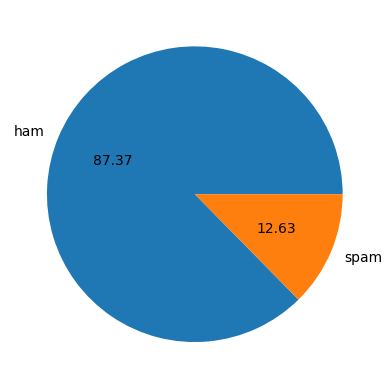

In [16]:
plt.pie(df["Target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [17]:
import nltk
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [18]:
# num of character

df["Num_Character"] = df["Text"].apply(len)
df.head()

,Target,Text,Num_Character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# num of words

df["Num_Words"] =  df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,Num_Character,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
# num of sentences

df["Num_Sentences"] =  df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,Num_Character,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[["Num_Character", "Num_Words", "Num_Sentences"]].describe()

,Num_Character,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<AxesSubplot: xlabel='Num_Character', ylabel='Count'>

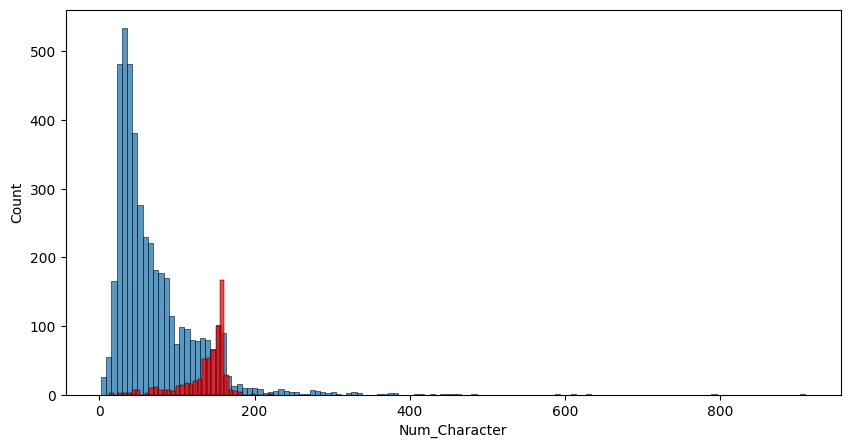

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Target"]==0]["Num_Character"])
sns.histplot(df[df["Target"]==1]["Num_Character"], color="red")

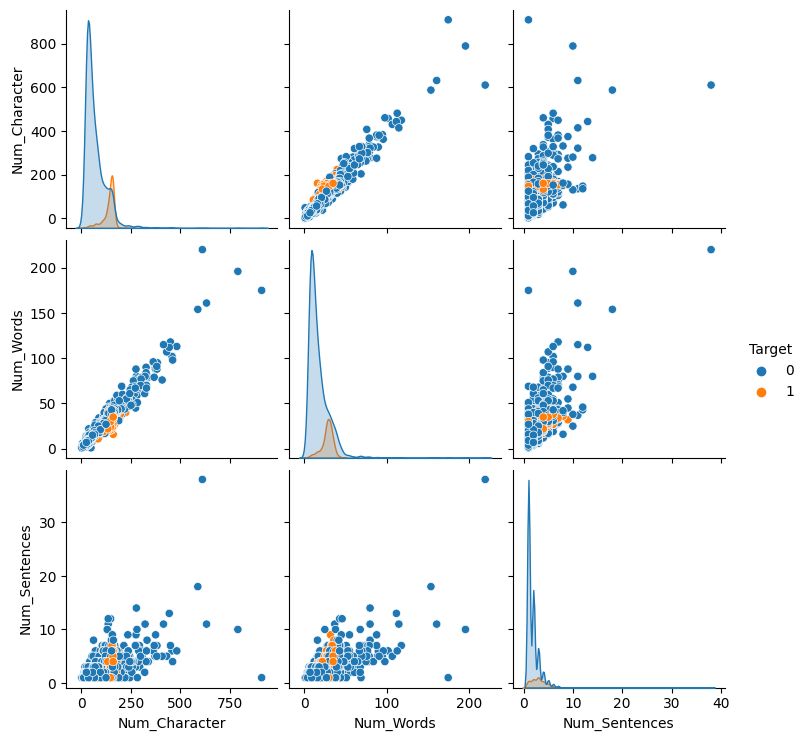

In [23]:
sns.pairplot(df, hue="Target")

## 3. Data Preprocessing

* Lower Case
* Tokenization
* Removing Special characters
* Removing stop words and punctuation
* Stemming



In [24]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def trans_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
            
    Text = y[:]
    y.clear()
     
    for i in Text:
        if i not in string.punctuation:
            y.append(i)
            
    Text = y[:]
    y.clear()
     
    for i in Text:
          y.append(ps.stem(i))   
    
    return " ".join(y)


In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
df["Transformed_Text"] = df["Text"].apply(trans_text)

In [27]:
df.head()

,Target,Text,Num_Character,Num_Words,Num_Sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


## 4. Model Building 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000) 

In [29]:
X = tfidf.fit_transform(df["Transformed_Text"]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
X.shape

(5169, 3000)

In [31]:
Y = df["Target"].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [33]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [34]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print("accuracy_score is:",accuracy_score(Y_test, Y_pred1))
print("precision_score is:",precision_score(Y_test, Y_pred1))
print("confusion_matrix is:\n",confusion_matrix(Y_test, Y_pred1))

accuracy_score is: 0.8771760154738878
precision_score is: 0.5251141552511416
confusion_matrix is:
 [[792 104]
 [ 23 115]]


In [35]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print("accuracy_score is:",accuracy_score(Y_test, Y_pred2))
print("precision_score is:",precision_score(Y_test, Y_pred2))
print("confusion_matrix is:\n",confusion_matrix(Y_test, Y_pred2))

accuracy_score is: 0.9680851063829787
precision_score is: 1.0
confusion_matrix is:
 [[896   0]
 [ 33 105]]


In [36]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print("accuracy_score is:",accuracy_score(Y_test, Y_pred3))
print("precision_score is:",precision_score(Y_test, Y_pred3))
print("confusion_matrix is:\n",confusion_matrix(Y_test, Y_pred3))

accuracy_score is: 0.9806576402321083
precision_score is: 0.9758064516129032
confusion_matrix is:
 [[893   3]
 [ 17 121]]


In [37]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))